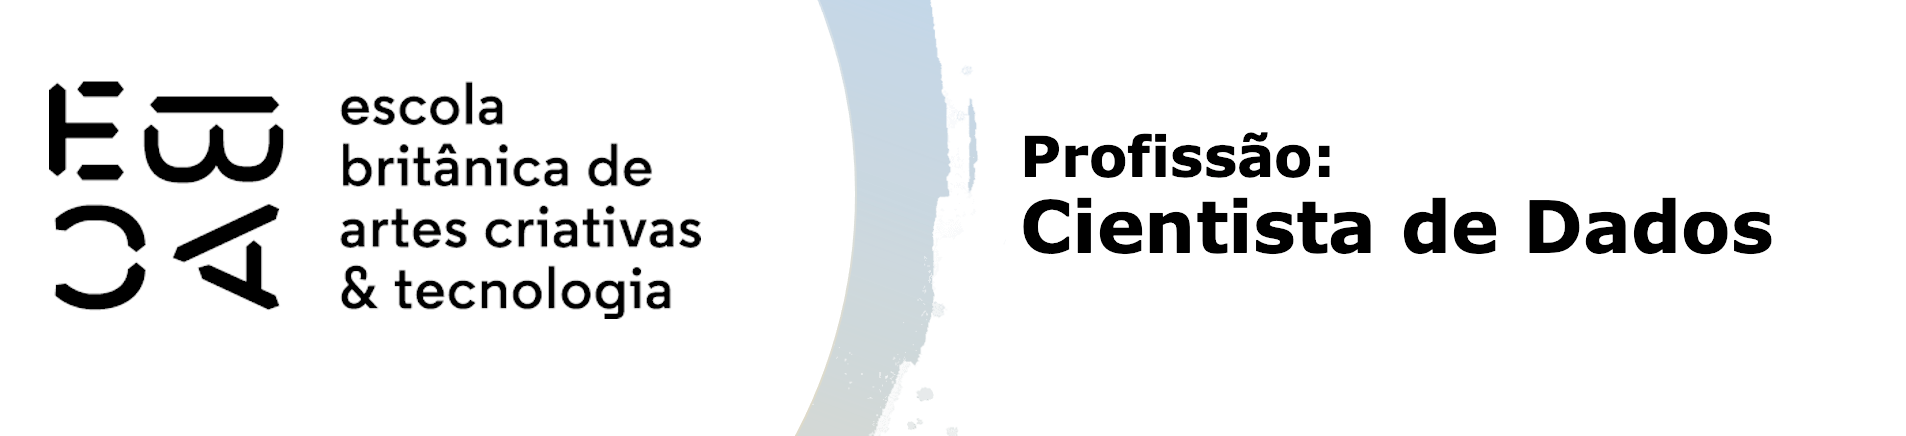

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [110]:
# Carrego a base
df_inicial = sns.load_dataset('penguins')
df_inicial.index.name = 'id'

# Pego só as colunas numéricas
df_num = df.select_dtypes('number').dropna()
df_num.index.name = 'id'

# Padronizo os dados
df_pad = pd.DataFrame(StandardScaler().fit_transform(df_num), columns=df_num.columns)
df_pad.index.name = 'id'

df_pad.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


Criação do modelo para agrupamento

In [111]:
clus = AgglomerativeClustering(n_clusters = 3, 
                               linkage = 'complete')

clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

Adiciono as previsões em uma nova coluna do dataframe original

In [112]:
df_num['grupo'] = clus.labels_

df = df_inicial.copy()

df = df.merge(right = df_num['grupo'], how = 'left', on = 'id')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


Geração do dendograma

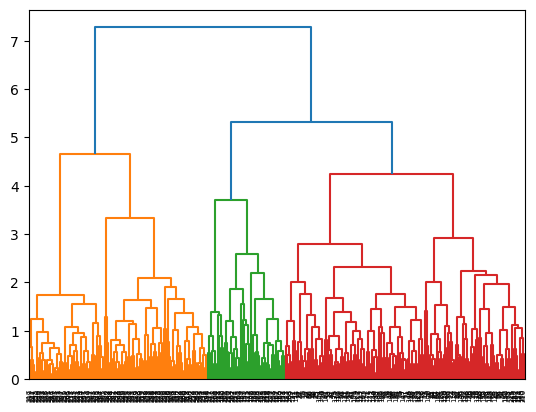

In [113]:
dendograma = shc.dendrogram( shc.linkage(y = df_pad, method = 'complete') )

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

Quantidade de pinguins por grupo

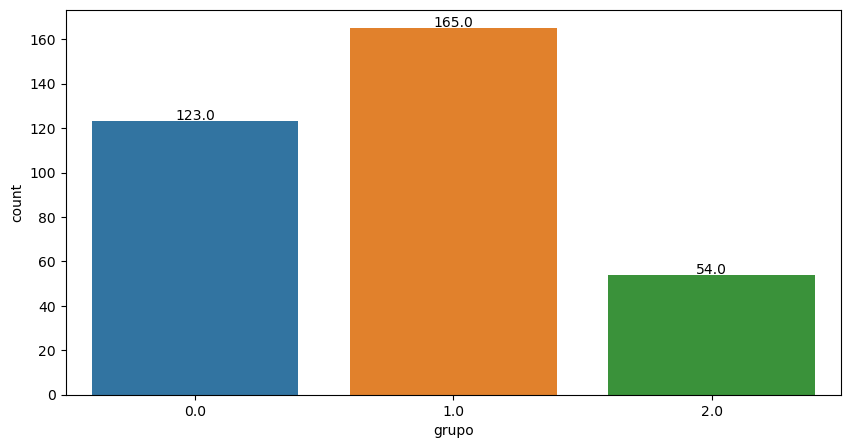

In [114]:
figura = plt.figure(figsize = (10,5))

ax = sns.countplot(data = df, x = 'grupo')

for i in ax.patches:

    ax.annotate(text = i.get_height(),
                xy = (i.get_x() + i.get_width()/2, i.get_height()),
                va = 'baseline',
                ha = 'center', 
                xytext=(0,1), 
                textcoords='offset points')

In [115]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


Assertividade do agrupamento

- Pode-se notar que todos os Adelie foram classificados como grupo 1, todos os Gentoo como grupo 1 e os Chinstrap em sua maioria como grupo 2, com alguns sendo classificados no grupo 1.

In [116]:
tab_cruzada = pd.crosstab(df['species'], df['grupo'])
tab_cruzada

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


Variáveis quantitativas de cada grupo

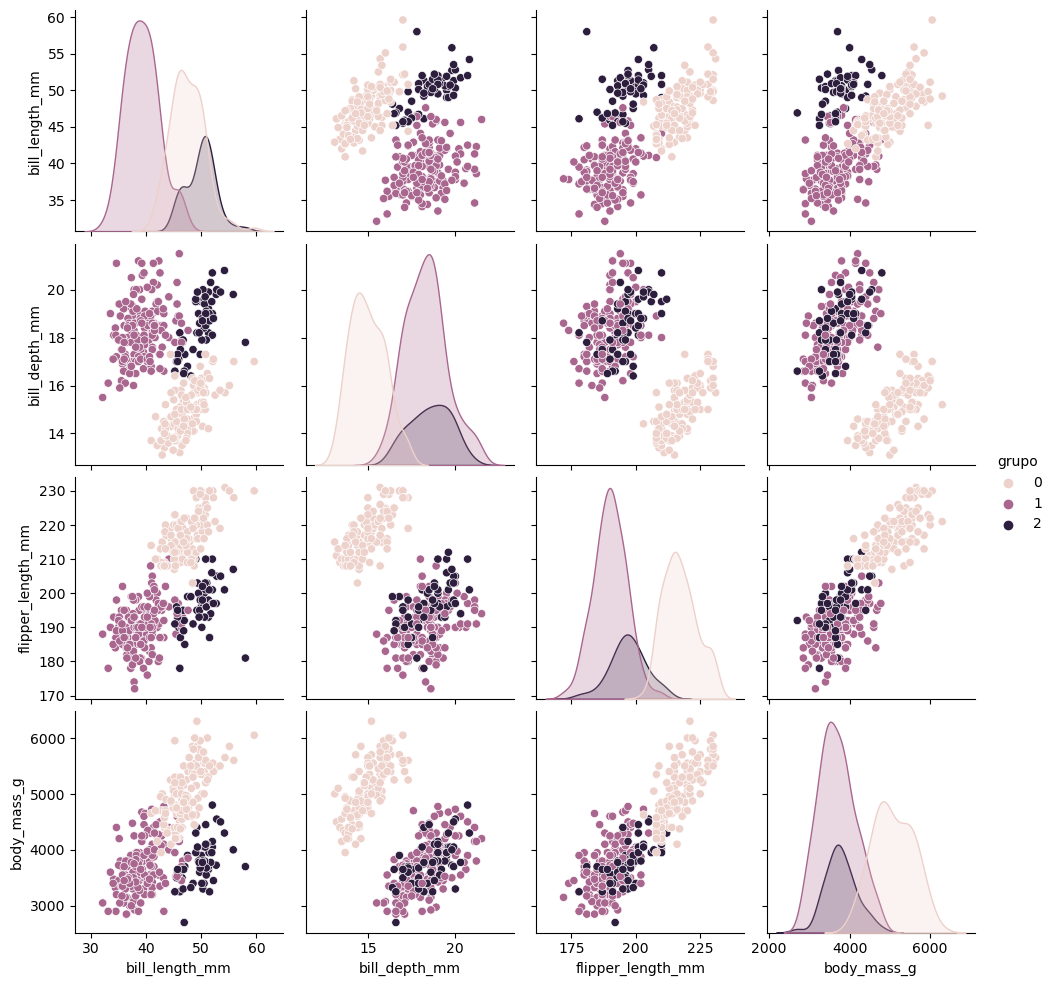

In [117]:
sns.pairplot(data = df_num, hue = 'grupo')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

**O dendograma gerado no item 1, sugere que um bom número de grupos seria 5. Pois os grupos 0 e 2 podem ser divididos mais uma vez e manterem uma boa distribuição, mas o grupo 1 não parece que terá uma boa distribuição se for divido novamente.**

Novo agrupamento, com 5 grupos.

In [147]:
clus = AgglomerativeClustering(n_clusters = 5, 
                               linkage = 'complete')

clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

Guardar os grupos nos dataframes

In [148]:
df_num['grupo'] = clus.labels_

df = df_inicial.copy()

df = df.merge(right = df_num['grupo'], 
              how = 'left', 
              on = 'id')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4.0


Quantidade de pinguins por grupo e sexo

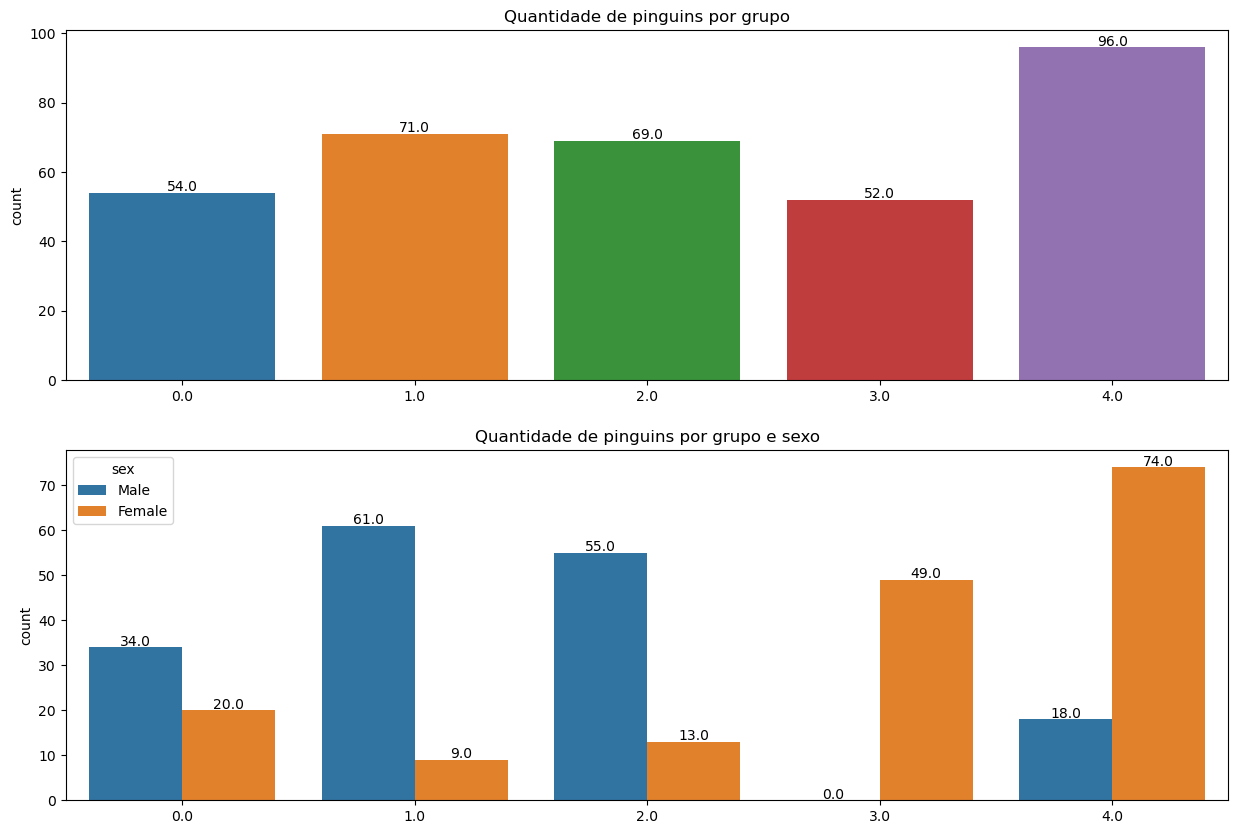

In [149]:
figura, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(data = df, x = 'grupo', ax=ax1)

sns.countplot(data = df, x = 'grupo', hue = 'sex', ax=ax2)


ax1.set_xlabel("")
ax2.set_xlabel("")

ax1.set_title("Quantidade de pinguins por grupo")
ax2.set_title("Quantidade de pinguins por grupo e sexo")


for i in ax1.patches:

    ax1.annotate(text = i.get_height(),
                xy = (i.get_x() + i.get_width()/2, i.get_height()),
                va = 'baseline',
                ha = 'center', 
                xytext=(0,1), 
                textcoords='offset points')
    
for i in ax2.patches:

    ax2.annotate(text = i.get_height(),
                xy = (i.get_x() + i.get_width()/2, i.get_height()),
                va = 'baseline',
                ha = 'center', 
                xytext=(0,1), 
                textcoords='offset points')


plt.show()

Como pode-se observar nos gráficos abaixo, o agrupamento não parece ter ficado muito bom, aumentar de 3 para 5 grupos não surtiu um bom efeito.

Os grupos não ficaram com um padrão bem definido, estão muito misturados.

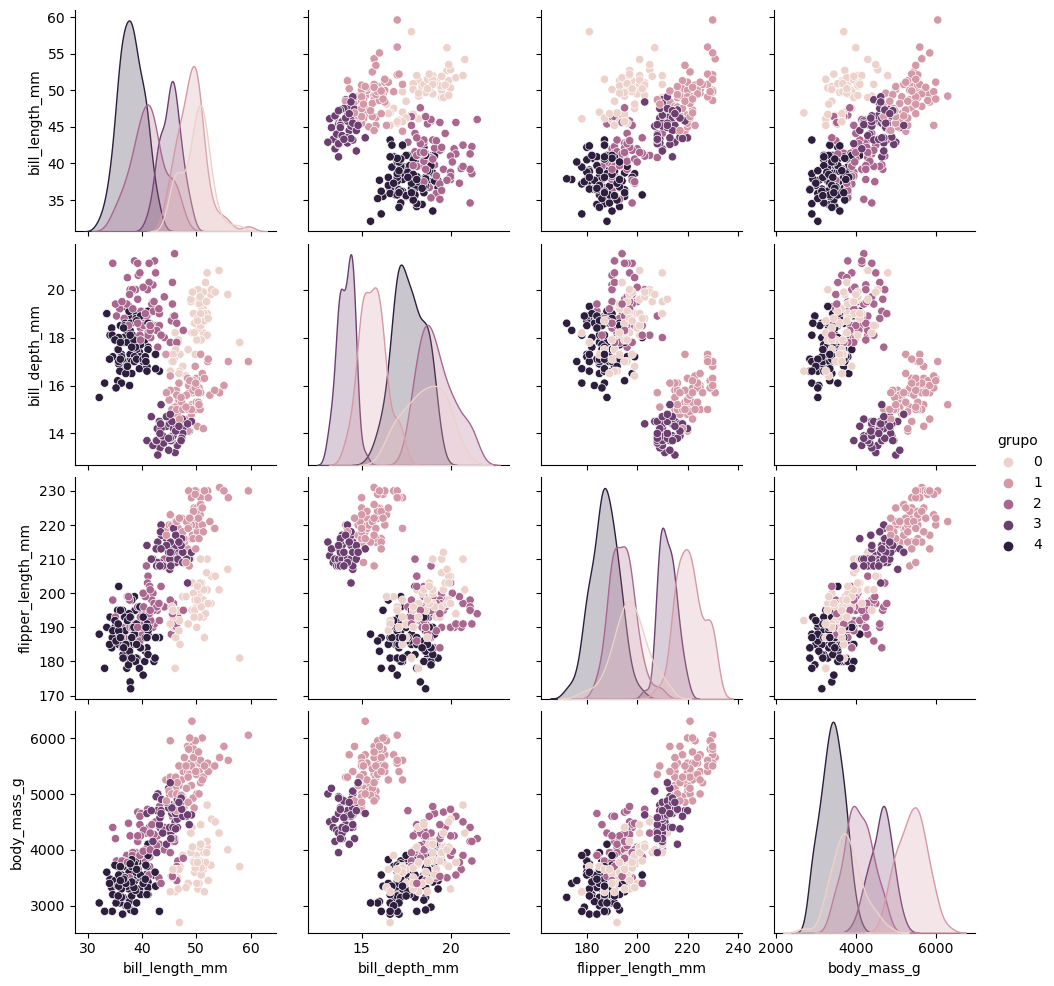

In [151]:
sns.pairplot(df_num, hue = 'grupo')